<a href="https://colab.research.google.com/github/mkm9866/ibm-employee-attrition-models/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Bootcamp Final: ...

## Introduction to Problem and Data

### Problem Statement

Employee attrition is a critical challenge for organizations, impacting productivity, profitability, and operational efficiency. IBM has outlined several key concerns that arise from employee attrition, including the substantial costs associated with training new employees, the loss of experienced staff, and the resulting declines in productivity and profit margins (Swaminathan and Hagarty). Understanding the factors driving attrition is crucial not only for large corporations like IBM but also for smaller organizations that may lack the resources or historical data to address such issues effectively.

Key business questions include identifying the factors contributing most to attrition and determining actionable strategies to retain employees. The insights from such analyses can guide similar organizations in mitigating attrition and developing strategies to sustain their workforce. Companies can establish frameworks to enhance employee retention and long-term organizational success by addressing these questions and leveraging data-driven approaches.


### Dataset Description

The data for this project is sourced from Kaggle in CSV format. It provides comprehensive HR analytics data on employees who stay and leave. The dataset contains 1470 rows of individual IBM employees and 35 columns representing their different demographic and work-related features, which can help predict employee attrition.


### Data Pre-Processing and Preliminary Examination

With over 35 different features in the dataset, the data required light cleaning of features in the pre-processing stage. Too many features would likely lead to an overfit model. The simpler the model, the better the feasibility and research reproducibility. Therefore, this analysis will focus on work-related features with implications for where companies could intervene and reduce attrition risk rather than demographic features. Thus, the revised dataset will only include the following features: Attrition, Business Travel, Department, Distance From Home, Environment Satisfaction, JobInvolvement, Job Level, Job Role, Job Satisfaction, Monthly Income, Over Time, Percent Salary Hike, Performance Rating, Stock Option Level, Total Working Years, Training Times Last Year, Work-Life Balance, Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager.


The data provided is complete with no null values, easing data processing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
ibm_data = 'emp_attrition.csv'
df = pd.read_csv(ibm_data)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
columns = ['DailyRate', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df.drop(columns, inplace=True, axis=1)

Removing columns not deemed necessary.

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Female,3,2,Sales Executive,...,11,3,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,3,Male,2,2,Research Scientist,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,4,Male,2,1,Laboratory Technician,...,15,3,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Female,3,1,Research Scientist,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Male,3,1,Laboratory Technician,...,12,3,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


Approx. 16% of people quit and 84% stayed at the company.

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
EnvironmentSatisfaction,0
Gender,0
JobInvolvement,0
JobLevel,0
JobRole,0


No null values.

## Exploratory Data Analysis

The preliminary examination showed a clear imbalance between the number of employees who stay and those who leave. 237 of the 1470 employees listed left the company, meaning 84% of employees stayed and 16% percent left.


### Descriptive Statistics

In [ ]:
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,2,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Male,NaN,NaN,Sales Executive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,882,NaN,NaN,326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.721769,NaN,2.729932,2.063946,NaN,...,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.093082,NaN,0.711561,1.106940,NaN,...,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,2.000000,1.000000,NaN,...,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,3.000000,2.000000,NaN,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,3.000000,3.000000,NaN,...,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [134]:
features = ['DistanceFromHome', 'EnvironmentSatisfaction',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
            'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
            'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
numeric_features = df[features].select_dtypes(include=np.number).columns.tolist()
summary_stats = df[features].describe().T
summary_stats['median'] = df[numeric_features].median()
summary_stats = summary_stats[['mean', 'median', 'std', 'min', 'max']]
styled_summary = summary_stats.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '80%'), ('margin', '20px auto')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]}
])

styled_summary

,mean,median,std,min,max
DistanceFromHome,9.192517,7.000000,8.106864,1.000000,29.000000
EnvironmentSatisfaction,2.721769,3.000000,1.093082,1.000000,4.000000
JobInvolvement,2.729932,3.000000,0.711561,1.000000,4.000000
JobLevel,2.063946,2.000000,1.106940,1.000000,5.000000
JobSatisfaction,2.728571,3.000000,1.102846,1.000000,4.000000
MonthlyIncome,6502.931293,4919.000000,4707.956783,1009.000000,19999.000000
PercentSalaryHike,15.209524,14.000000,3.659938,11.000000,25.000000
PerformanceRating,3.153741,3.000000,0.360824,3.000000,4.000000
StockOptionLevel,0.793878,1.000000,0.852077,0.000000,3.000000
TotalWorkingYears,11.279592,10.000000,7.780782,0.000000,40.000000


In [133]:
categorical_features = ['BusinessTravel', 'Department', 'JobRole', 'OverTime']
categorical_df = df[categorical_features]

categorical_desc = categorical_df.describe().T
categorical_desc['Top'] = categorical_df.mode().iloc[0]
categorical_desc['Top Frequency'] = categorical_df.apply(lambda x: x.value_counts().iloc[0])
categorical_desc = categorical_desc[['count', 'unique', 'top', 'freq', 'Top', 'Top Frequency']]

styled_categorical_desc = categorical_desc.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '80%'), ('margin', '20px auto')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]}
])

styled_categorical_desc


,count,unique,top,freq,Top,Top Frequency
BusinessTravel,1470,3,Travel_Rarely,1043,Travel_Rarely,1043
Department,1470,3,Research & Development,961,Research & Development,961
JobRole,1470,9,Sales Executive,326,Sales Executive,326
OverTime,1470,2,No,1054,No,1054


In [114]:
features = [
    'BusinessTravel', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction',
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
    'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

desc_stats = df[features].describe().transpose()[['mean', '50%', 'std', 'min', 'max']]

desc_stats = desc_stats.rename(columns={'50%': 'median'})

print(desc_stats)

                                mean  median          std     min      max
DistanceFromHome            9.192517     7.0     8.106864     1.0     29.0
EnvironmentSatisfaction     2.721769     3.0     1.093082     1.0      4.0
JobInvolvement              2.729932     3.0     0.711561     1.0      4.0
JobLevel                    2.063946     2.0     1.106940     1.0      5.0
JobSatisfaction             2.728571     3.0     1.102846     1.0      4.0
MonthlyIncome            6502.931293  4919.0  4707.956783  1009.0  19999.0
PercentSalaryHike          15.209524    14.0     3.659938    11.0     25.0
PerformanceRating           3.153741     3.0     0.360824     3.0      4.0
StockOptionLevel            0.793878     1.0     0.852077     0.0      3.0
TotalWorkingYears          11.279592    10.0     7.780782     0.0     40.0
TrainingTimesLastYear       2.799320     3.0     1.289271     0.0      6.0
WorkLifeBalance             2.761224     3.0     0.706476     1.0      4.0
YearsAtCompany           

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Initial Visualizations

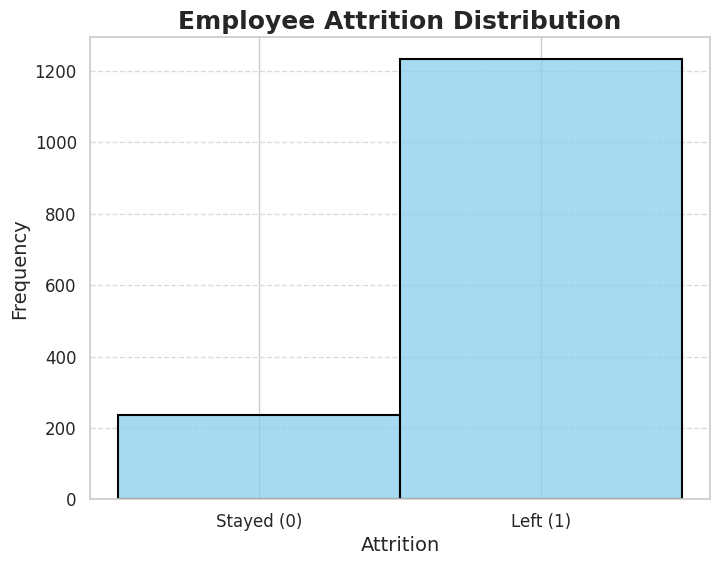

In [135]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(df['Attrition'], bins=2, kde=False, color='skyblue', discrete=True, linewidth=1.5, edgecolor='black')

plt.title('Employee Attrition Distribution', fontsize=18, weight='bold')
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks([0, 1], ['Stayed (0)', 'Left (1)'], fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Looking for clear trends through visuals here--very bulky, skip to models.

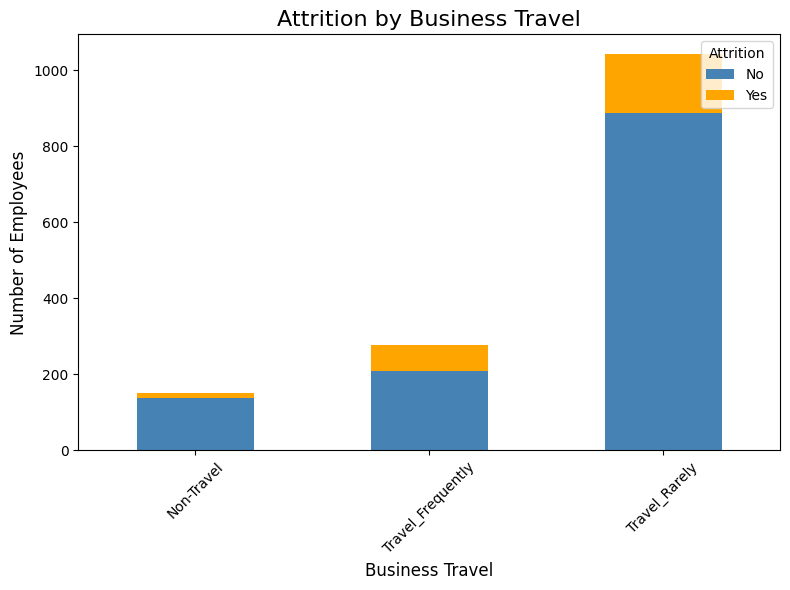

In [ ]:
df.groupby(['BusinessTravel', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=(8, 6), color=['steelblue', 'orange'])

plt.title('Attrition by Business Travel', fontsize=16)
plt.xlabel('Business Travel', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

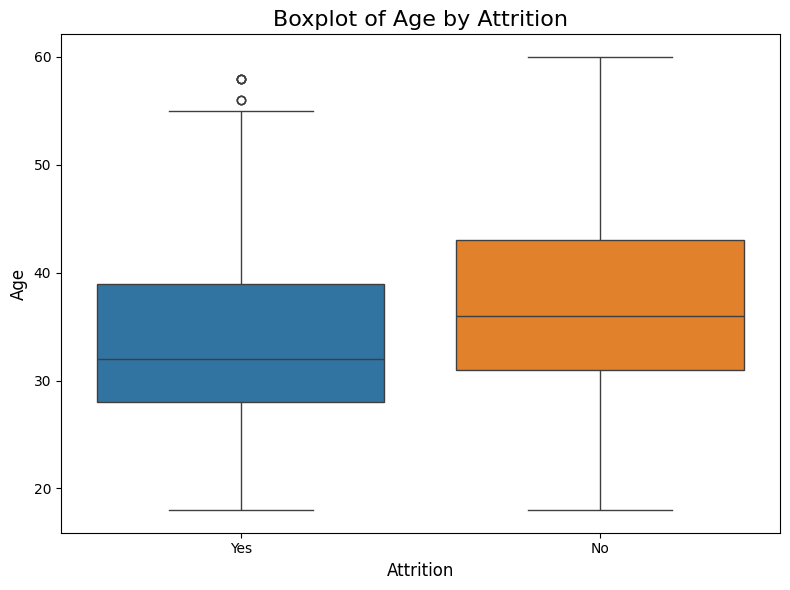

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df, hue='Attrition')

plt.title('Boxplot of Age by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.tight_layout()
plt.show()

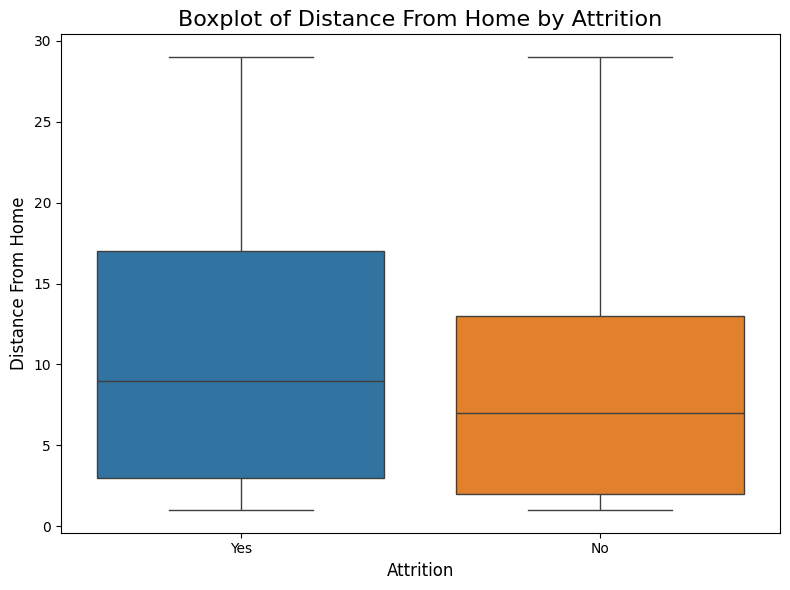

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, hue='Attrition')

plt.title('Boxplot of Distance From Home by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Distance From Home', fontsize=12)

plt.tight_layout()
plt.show()

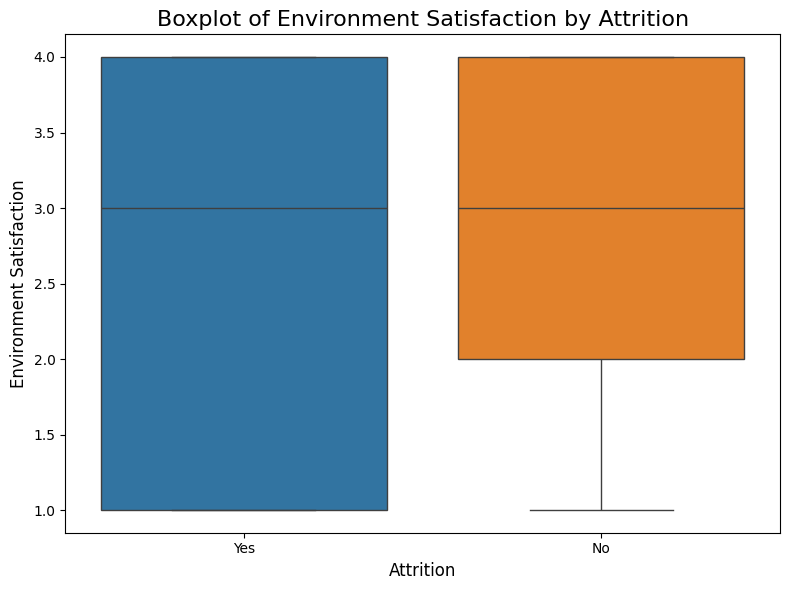

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df, hue='Attrition')

plt.title('Boxplot of Environment Satisfaction by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Environment Satisfaction', fontsize=12)

plt.tight_layout()
plt.show();

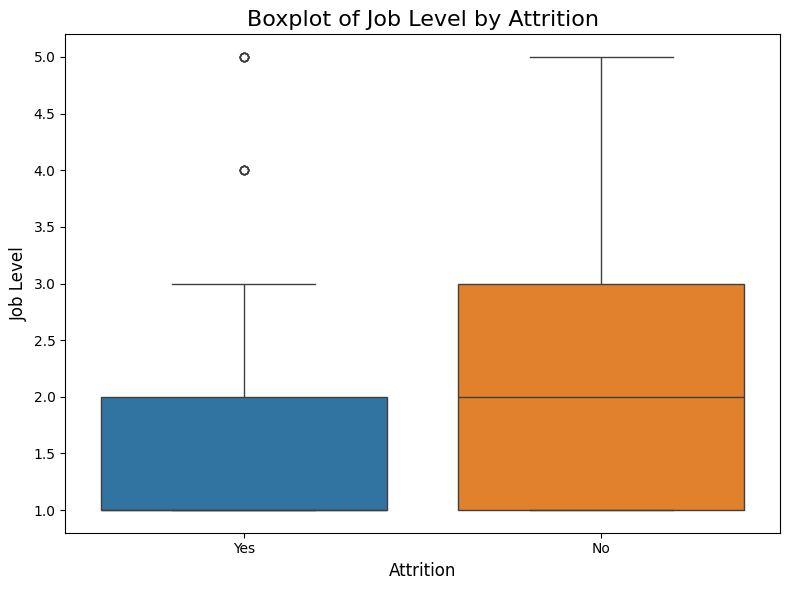

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='JobLevel', data=df, hue='Attrition')

plt.title('Boxplot of Job Level by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Job Level', fontsize=12)

plt.tight_layout()
plt.show();

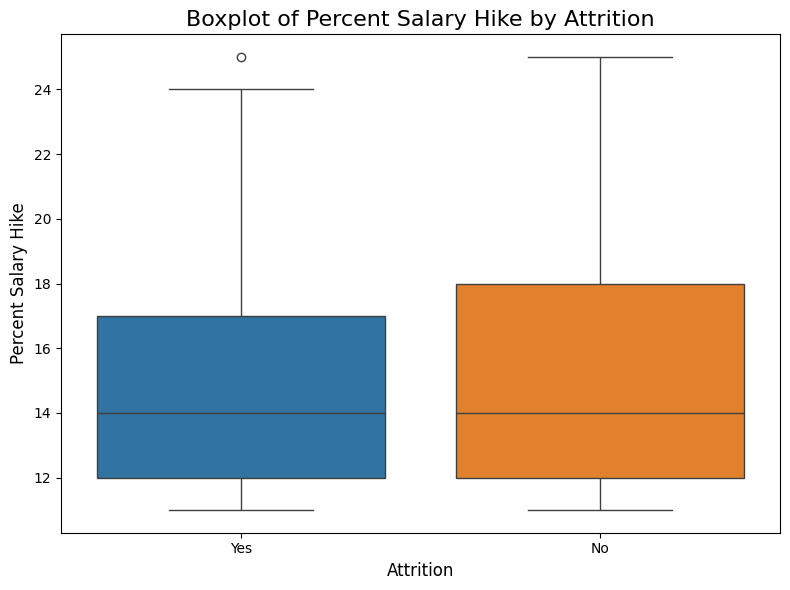

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df, hue='Attrition')

plt.title('Boxplot of Percent Salary Hike by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Percent Salary Hike', fontsize=12)

plt.tight_layout()
plt.show();

## Modeling and Interpretations

### Baseline Model

Predicting Who Will Leave Correctly (True Positives)
This is critical because employee retention is costly or strategically important.
Losing employees results in significant costs (e.g., training, recruitment, knowledge gaps), identifying who will leave allows you to take proactive retention actions (e.g., bonuses, better work conditions).
Certain roles are harder to replace.For high-value or hard-to-replace employees, prioritizing accurate predictions of those likely to leave may be more important.
Risk of Prioritizing This:
You might falsely classify employees as likely to leave (false positives), wasting resources on retention efforts for employees who would have stayed.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X = df[['BusinessTravel', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class_probs = y_train.value_counts(normalize=True)
prob_no = class_probs['No']   # Probability of Attrition = 'No'
prob_yes = class_probs['Yes']  # Probability of Attrition = 'Yes'

probability_based_predictions = np.random.choice(['No', 'Yes'], size=len(y_test), p=[prob_no, prob_yes])

accuracy = accuracy_score(y_test, probability_based_predictions)
precision = precision_score(y_test, probability_based_predictions, pos_label='Yes')
recall = recall_score(y_test, probability_based_predictions, pos_label='Yes')
f1 = f1_score(y_test, probability_based_predictions, pos_label='Yes')

print(f"Probability-Based Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Probability-Based Model Metrics:
Accuracy: 0.72
Precision: 0.19
Recall: 0.33
F1 Score: 0.24


### First Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer

In [ ]:
X = df[['BusinessTravel', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lgr = LogisticRegression()

In [ ]:
scaler = StandardScaler()

In [ ]:
encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['BusinessTravel', 'Department', 'JobRole', 'OverTime'])],
    remainder='passthrough',
    verbose_feature_names_out=False)
scaler = StandardScaler()
lgr = LogisticRegression()
lgr_pipe = Pipeline([('transform', encoder), ('scale', scaler), ('model', lgr)])

In [ ]:
lgr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department', 'JobRole',
                                                   'OverTime'])],
                                   verbose_feature_names_out=False)),
                ('scale', StandardScaler()), ('model', LogisticRegression())])

In [ ]:
y_pred = lgr_pipe.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.96      0.93       255
         Yes       0.52      0.31      0.39        39

    accuracy                           0.87       294
   macro avg       0.71      0.63      0.66       294
weighted avg       0.85      0.87      0.86       294



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Logistic Regression Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Logistic Regression Model Metrics:
Accuracy: 0.87
Precision: 0.52
Recall: 0.31
F1 Score: 0.39


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

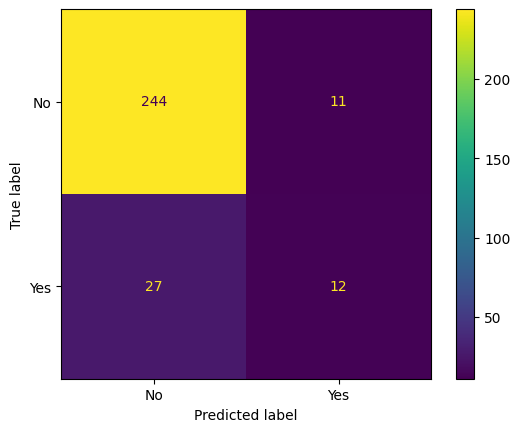

In [ ]:
conf_matrix = ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test);

In [ ]:
coefficients = lgr_pipe.named_steps['model'].coef_.flatten()

In [ ]:
encoded_feature_names = lgr_pipe.named_steps['transform'].get_feature_names_out()

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': coefficients})

In [ ]:
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance['Model'] = 'LogisticRegression'
print(feature_importance[['Feature', 'Importance', 'Model']])

                              Feature  Importance               Model
30                 YearsInCurrentRole    0.615999  LogisticRegression
11          JobRole_Research Director    0.552990  LogisticRegression
25                   StockOptionLevel    0.532738  LogisticRegression
31            YearsSinceLastPromotion    0.473511  LogisticRegression
15                        OverTime_No    0.441055  LogisticRegression
16                       OverTime_Yes    0.441055  LogisticRegression
21                    JobSatisfaction    0.439930  LogisticRegression
8       JobRole_Laboratory Technician    0.420905  LogisticRegression
29                     YearsAtCompany    0.409904  LogisticRegression
32               YearsWithCurrManager    0.409580  LogisticRegression
18            EnvironmentSatisfaction    0.393209  LogisticRegression
6   JobRole_Healthcare Representative    0.378314  LogisticRegression
7             JobRole_Human Resources    0.360531  LogisticRegression
19                  

### Second Model: RandomForests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest_pipe = Pipeline([('transform', encoder), ('scale', scaler), ('model', forest)])

In [ ]:
forest_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department', 'JobRole',
                                                   'OverTime'])],
                                   verbose_feature_names_out=False)),
                ('scale', StandardScaler()),
                ('model', RandomForestClassifier())])

In [ ]:
y_pred1 = forest_pipe.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       255
         Yes       0.29      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.58      0.52      0.50       294
weighted avg       0.79      0.86      0.81       294



In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, pos_label='Yes')
recall = recall_score(y_test, y_pred1, pos_label='Yes')
f1 = f1_score(y_test, y_pred1, pos_label='Yes')

print(f"Random Forest Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Model Metrics:
Accuracy: 0.86
Precision: 0.29
Recall: 0.05
F1 Score: 0.09


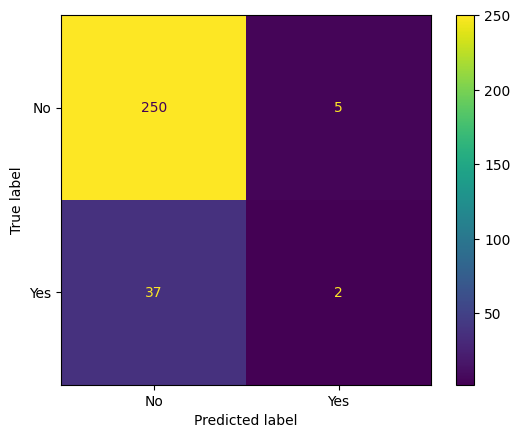

In [ ]:
conf_matrix1 = ConfusionMatrixDisplay.from_estimator(forest_pipe, X_test, y_test);

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
params = {'model__max_depth': [4, 6, 8, 12, 16, 20], 'model__n_estimators': [50, 100, 200]}
scoring = make_scorer(recall_score, pos_label='Yes')
forest_grid = GridSearchCV(forest_pipe, param_grid=params, scoring=scoring)
forest_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'JobRole',
                                                                          'OverTime'])],
                                                          verbose_feature_names_out=False)),
                                       ('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [4, 6, 8, 12, 16, 20],
                         'model__n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Yes))

In [ ]:
forest_grid.score(X_test, y_test)

0.10256410256410256

In [ ]:
forest_grid.best_params_

{'model__max_depth': 20, 'model__n_estimators': 50}

In [ ]:
y_pred2 = forest_grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, pos_label='Yes')
recall = recall_score(y_test, y_pred2, pos_label='Yes')
f1 = f1_score(y_test, y_pred2, pos_label='Yes')

print(f"Random Forest Model with Best Params Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Model with Best Params Metrics:
Accuracy: 0.87
Precision: 0.50
Recall: 0.10
F1 Score: 0.17


In [128]:
#creating new pipe with best params

In [127]:
forest1 = RandomForestClassifier(n_estimators=50, max_depth=20)

In [129]:
forest_pipe1 = Pipeline([('transform', encoder), ('scale', scaler), ('model', forest1)])

In [130]:
forest_pipe1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department', 'JobRole',
                                                   'OverTime'])],
                                   verbose_feature_names_out=False)),
                ('scale', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=50))])

In [131]:
y_pred4 = forest_pipe1.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred4))

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



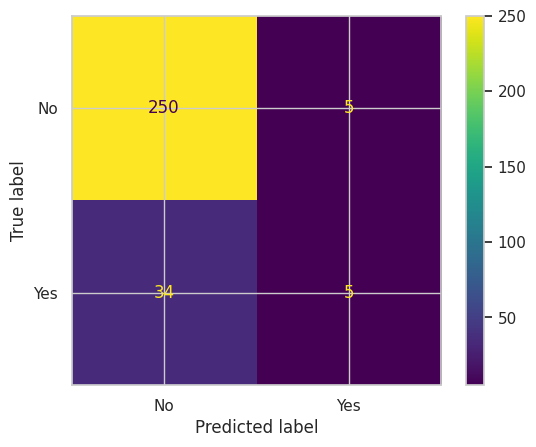

In [132]:
conf_matrix2 = ConfusionMatrixDisplay.from_estimator(forest_pipe1, X_test, y_test);

### Third Model: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb_pipe = Pipeline([('transform', encoder), ('scale', scaler), ('model', nb)])

In [ ]:
nb_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department', 'JobRole',
                                                   'OverTime'])],
                                   verbose_feature_names_out=False)),
                ('scale', StandardScaler()), ('model', GaussianNB())])

In [ ]:
y_pred3 = nb_pipe.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.67      0.77       255
         Yes       0.21      0.56      0.31        39

    accuracy                           0.66       294
   macro avg       0.56      0.62      0.54       294
weighted avg       0.82      0.66      0.71       294



In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, pos_label='Yes')
recall = recall_score(y_test, y_pred3, pos_label='Yes')
f1 = f1_score(y_test, y_pred3, pos_label='Yes')

print(f"Naive Bayes Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Naive Bayes Model Metrics:
Accuracy: 0.66
Precision: 0.21
Recall: 0.56
F1 Score: 0.31


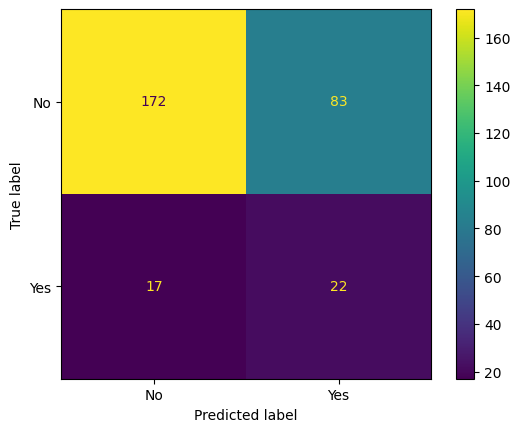

In [ ]:
conf_matrix3 = ConfusionMatrixDisplay.from_estimator(nb_pipe, X_test, y_test);

In [ ]:
nb_model = nb_pipe.named_steps['model']

In [ ]:
means = nb_model.theta_
variances = nb_model.var_

In [ ]:
feature_importance = 1 / np.var(variances, axis=0)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance})

ValueError: All arrays must be of the same length

In [ ]:
encoded_feature_names = nb_pipe.named_steps['transform'].get_feature_names_out()

In [ ]:
means = nb_pipe.named_steps['model'].theta_
variances = nb_pipe.named_steps['model'].var_

In [ ]:
feature_importance = 1 / np.mean(variances, axis=0)

In [ ]:
mean_diff = np.abs(np.mean(means, axis=0))

In [ ]:
combined_importance = feature_importance * mean_diff

In [ ]:
importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': combined_importance})

In [ ]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                              Feature  Importance
15                        OverTime_No    0.241392
16                       OverTime_Yes    0.241392
30                 YearsInCurrentRole    0.177623
20                           JobLevel    0.172702
22                      MonthlyIncome    0.168204
26                  TotalWorkingYears    0.160072
32               YearsWithCurrManager    0.157167
25                   StockOptionLevel    0.140130
6   JobRole_Healthcare Representative    0.125099
11          JobRole_Research Director    0.121812
29                     YearsAtCompany    0.117425
9                     JobRole_Manager    0.103515
14       JobRole_Sales Representative    0.103321
10     JobRole_Manufacturing Director    0.101354
19                     JobInvolvement    0.098687
21                    JobSatisfaction    0.091260
1    BusinessTravel_Travel_Frequently    0.089045
0           BusinessTravel_Non-Travel    0.085980
8       JobRole_Laboratory Technician    0.078588


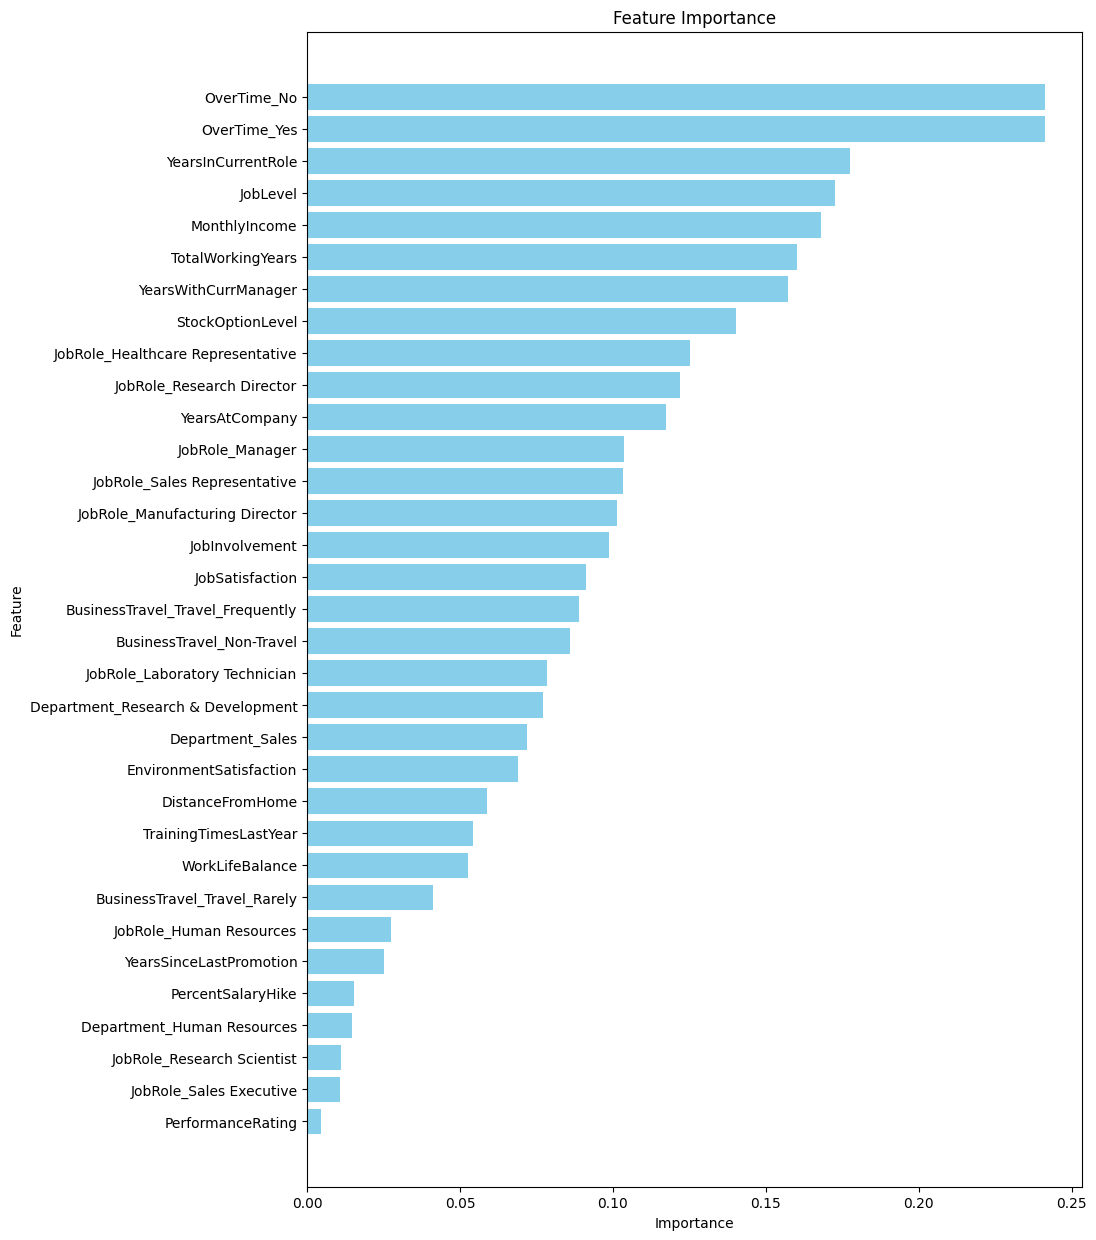

In [ ]:
plt.figure(figsize=(10, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()